# Machine Learning on Text: Clustering Assignment

In [1]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Ingest the company_profiles data set into a corpus.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
PATH = '/content/drive/MyDrive/company_profiles/'

DOC_PATTERN = r'.*\.txt'

corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)
corpus.fileids()[0]

'A-profile.txt'

### Create a list of documents by extracting the raw text for each fileid in the corpus.

In [5]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]
docs[0]

"Agilent Technologies, Inc. provides application focused solutions to the life sciences, diagnostics, and applied chemical markets worldwide. It operates in three segments: Life Sciences and Applied Markets, Diagnostics and Genomics, and Agilent CrossLab. The Life Sciences and Applied Markets segment offers liquid chromatography systems and components; liquid chromatography mass spectrometry systems; gas chromatography systems and components; gas chromatography mass spectrometry systems; inductively coupled plasma mass spectrometry instruments; atomic absorption instruments; microwave plasma-atomic emission spectrometry instruments; inductively coupled plasma optical emission spectrometry instruments; raman spectroscopy; microfluidics based automated electrophoresis products; cell analysis plate based assays; laboratory software and informatics systems; laboratory automation; dissolution testing; vacuum pumps; and measurement technologies. The Diagnostics and Genomics segment provides 

### Preprocess the documents, including the steps below.

- Word tokenize the document.
- Lowercase all tokens.
- Lemmatize and stem the tokens.
- Remove stop words and punctuation.

In [6]:
def preprocess(docs):
  lemmatizer = WordNetLemmatizer()
  stemmer = SnowballStemmer('english')
  preprocessed = []

  for doc in docs:
    tokenized = word_tokenize(doc)

    cleaned = [stemmer.stem(lemmatizer.lemmatize(token.lower())) for token in tokenized
               if not token.lower() in stopwords.words('english')
               if token.isalpha()
               ]
    untokenized = " ".join(cleaned)
    preprocessed.append(untokenized)
  
  return preprocessed

In [7]:
preprocessed = preprocess(docs)

### TF-IDF vectorize the preprocessed documents.

In [14]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(preprocessed)
vectorized = pd.DataFrame(vectors.toarray() , columns=vectorizer.get_feature_names())
vectorized

,aaa,aac,aad,aaon,aar,aaron,aastrom,aav,ab,abacus,abak,abaloparatid,abanderado,abandon,abat,abaxi,abbotsford,abbott,abboud,abbvi,abc,abcit,abdomin,abel,abeona,abercrombi,abil,abilen,abilitec,abington,abiom,abirateron,abitibi,abl,ablat,abm,abnorm,aboveground,abra,abras,...,zixarch,zixdirectori,zixencrypt,zixit,zixon,zixprotect,znbr,zodiac,zoe,zoeti,zogenix,zohydro,zolmitriptan,zomajet,zombi,zone,zonedirector,zoneplann,zoo,zorba,zosano,zoster,zowi,zseri,zulili,zume,zumiez,zuramp,zurich,zurn,zvex,zydeco,zydelig,zydi,zynerba,zynga,zyrtec,zytiga,zyvox,übermonst
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.240561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.566246,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3554,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.297665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312605,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3555,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.135166,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3556,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000

### Determine the optimal number of clusters using the Yellowbrick library's KElbow Visualizer and a KMeans clustering algorithm.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfc5d528d0>,
                 k=None, metric=None, model=None, timings=True)

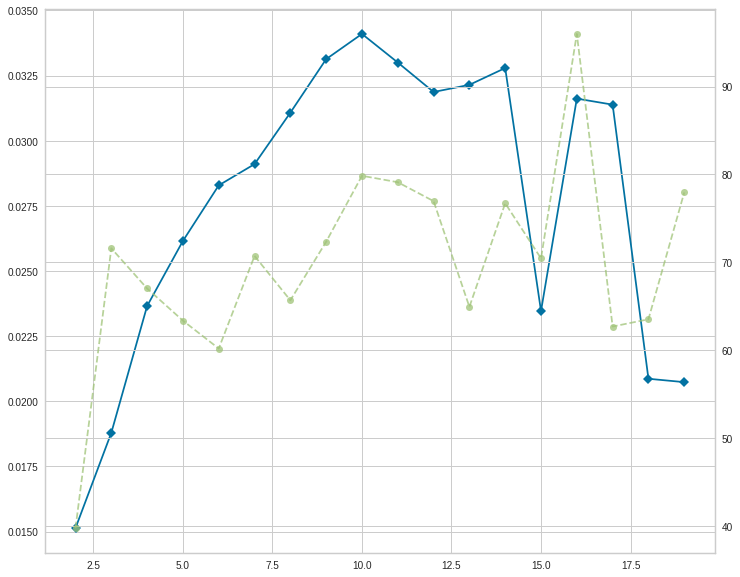

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette')
visualizer.fit(vectors)

### Perform K-Means Clustering using the optimal number of clusters determine in the previous step.

In [17]:
kmeans = KMeans(n_clusters=10)
kmeans_df = pd.DataFrame(docs, columns =['text'])
kmeans_df['Clusters'] = kmeans.fit_predict(vectors)
kmeans_df['File'] = corpus.fileids()
kmeans_df

,text,Clusters,File
0,"Agilent Technologies, Inc. provides applicatio...",5,A-profile.txt
1,"Alcoa Corporation produces and sells bauxite, ...",6,AA-profile.txt
2,"AAC Holdings, Inc. provides inpatient and outp...",6,AAC-profile.txt
3,"American Airlines Group Inc., through its subs...",6,AAL-profile.txt
4,"Altisource Asset Management Corporation, an as...",8,AAMC-profile.txt
...,...,...,...
3553,"Zoe's Kitchen, Inc., through its subsidiaries,...",6,ZOES-profile.txt
3554,"Zosano Pharma Corporation, a clinical stage ph...",9,ZSAN-profile.txt
3555,"Zoetis Inc. discovers, develops, manufactures,...",6,ZTS-profile.txt
3556,"Zumiez Inc., together with its subsidiaries, o...",6,ZUMZ-profile.txt


### Perform Agglomerative Clustering using the same number of clusters.

In [19]:
hier = AgglomerativeClustering(n_clusters=10)
hier_df = pd.DataFrame(docs, columns=['text'])
hier_df['Clusters'] = hier.fit_predict(vectors.toarray())
hier_df['File'] = corpus.fileids()
hier_df

,text,Clusters,File
0,"Agilent Technologies, Inc. provides applicatio...",1,A-profile.txt
1,"Alcoa Corporation produces and sells bauxite, ...",8,AA-profile.txt
2,"AAC Holdings, Inc. provides inpatient and outp...",4,AAC-profile.txt
3,"American Airlines Group Inc., through its subs...",8,AAL-profile.txt
4,"Altisource Asset Management Corporation, an as...",4,AAMC-profile.txt
...,...,...,...
3553,"Zoe's Kitchen, Inc., through its subsidiaries,...",1,ZOES-profile.txt
3554,"Zosano Pharma Corporation, a clinical stage ph...",5,ZSAN-profile.txt
3555,"Zoetis Inc. discovers, develops, manufactures,...",1,ZTS-profile.txt
3556,"Zumiez Inc., together with its subsidiaries, o...",1,ZUMZ-profile.txt


### Choose one of the three topic modeling approaches covered. Cluster into the optimal number of clusters and extract 5 keywords that represent the documents in each cluster.

In [20]:
from sklearn.decomposition import NMF

num_keywords = 5
num_topics = 8

model = NMF(n_components=num_topics)
model.fit_transform(vectors)

array([[0.        , 0.02564358, 0.0054199 , ..., 0.06457566, 0.00794623,
        0.        ],
       [0.002076  , 0.0085163 , 0.01377898, ..., 0.01698239, 0.00469314,
        0.02890089],
       [0.0063104 , 0.04973958, 0.00560672, ..., 0.        , 0.00567884,
        0.00225868],
       ...,
       [0.0037113 , 0.01234447, 0.        , ..., 0.02066388, 0.00992198,
        0.03955697],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.16616218],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00178437]])

In [21]:
pd.DataFrame(model.components_, columns=vectorizer.get_feature_names())

,aaa,aac,aad,aaon,aar,aaron,aastrom,aav,ab,abacus,abak,abaloparatid,abanderado,abandon,abat,abaxi,abbotsford,abbott,abboud,abbvi,abc,abcit,abdomin,abel,abeona,abercrombi,abil,abilen,abilitec,abington,abiom,abirateron,abitibi,abl,ablat,abm,abnorm,aboveground,abra,abras,...,zixarch,zixdirectori,zixencrypt,zixit,zixon,zixprotect,znbr,zodiac,zoe,zoeti,zogenix,zohydro,zolmitriptan,zomajet,zombi,zone,zonedirector,zoneplann,zoo,zorba,zosano,zoster,zowi,zseri,zulili,zume,zumiez,zuramp,zurich,zurn,zvex,zydeco,zydelig,zydi,zynerba,zynga,zyrtec,zytiga,zyvox,übermonst
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003698,0.000000,0.002048,0.000000,0.000000,0.000075,0.000122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.001697,0.000000e+00,0.000000,0.001275,0.00000,0.000000,0.000000,0.000000,0.001373,0.000098,0.000000,0.000000,0.003141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002646,0.000000,0.000000,0.000000,0.000000,0.000000,0.010723,0.000000,0.001659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002073,0.002139,0.000000,0.000000,0.000000,...,0.000686,0.000686,0.000686,0.000686,0.000686,0.000686,0.000018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000195,0.001147,0.001832,0.001832,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000533,0.000000,0.004367,0.000000,0.000000,0.000000,0.000000
2,0.000054,0.000000,5.646903e-05,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008643,0.000717,0.000015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000485,0.000000,0.000000,0.000000,0.000000,0.000454,0.000000,0.000000,0.000020,0.000000,0.001463,0.002285,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000393,0.000000,0.000356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001813,0.000000,0.000000,0.000000,0.000000,0.000000,6.574169e-07,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.001028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000091
3,0.000629,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000048,0.000000,0.009542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000015,0.003636,0.000000,0.000133,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.127726e-06,0.000029,0.000000,0.000000,0.000000,0.00000,0.000000,0.001426,0.000045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000373,0.002189,3.691082e-03,0.000000,0.000000,0.00000,0.003315,0.010874,0.016397,0.000000,0.000055,0.006757,0.000000,0.000000,0.000000,0.000559,0.000000,0.010082,0.000000,0.013768,0.000000,0.000000,0.001234,0.000000,0.004455,0.000000,0.003239,0.000000,0.000000,0.000000,0.000700,0.002587,0.000124,0.000426,0.005847,0.000000,0.009133,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000750,0.013947,0.001476,0.007425,0.001051,0.000000,0.002

In [24]:
for index, topic in enumerate(model.components_):
    print('Topic', index)
    for i in topic.argsort()[:-num_keywords - 1 : -1]:
        print(vectorizer.get_feature_names()[i], topic[i])
        
    print('-------------')

Topic 0
loan 2.3547119350090466
bank 1.5036234216129714
deposit 1.14272272864709
account 0.9844711839010049
commerci 0.702068847993097
-------------
Topic 1
servic 1.3812147850157046
solut 0.7693514607762844
manag 0.6923264864259112
provid 0.5107842789212862
softwar 0.4363387055515235
-------------
Topic 2
gas 1.196250857953866
natur 0.9260248938424551
oil 0.9147134749762533
energi 0.470628277234094
texa 0.39027957388754086
-------------
Topic 3
invest 1.416377097059856
fund 0.996049055234933
incom 0.5170363057895175
equiti 0.5013297186053094
trust 0.3873997381279446
-------------
Topic 4
treatment 0.7897381320729573
phase 0.7325742808977681
clinic 0.723893787958985
trial 0.6613418425451117
develop 0.606642280295697
-------------
Topic 5
system 0.8285628921158007
product 0.7953732613178123
manufactur 0.6802219704802265
industri 0.6306929982868436
segment 0.5803525681815005
-------------
Topic 6
insur 1.5398048189355866
life 0.4600423860791189
liabil 0.4215137109189635
properti 0.396207